In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn.decomposition as pca
import sklearn.preprocessing as StandardScaler
import scipy.stats as stats

In [3]:
from sklearn import datasets

# Load iris dataset
iris = datasets.load_iris()

In [8]:
type(iris.data)

numpy.ndarray

In [24]:
# Create a dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [26]:
df['target'] = iris.target
df['variety'] = df['target'].apply(lambda x: iris.target_names[x])

In [27]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,variety
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [31]:
df.drop(columns=['target'], inplace=True)

In [32]:
df.shape

(150, 5)

In [33]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
variety               object
dtype: object

In [34]:
#données manquantes 
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
variety              0
dtype: int64

In [ ]:
# analyse descriptive univariée

In [35]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
df.describe(include="object")

,variety
count,150
unique,3
top,setosa
freq,50


In [ ]:
# analyse descriptive des variables quantitatives

<Axes: >

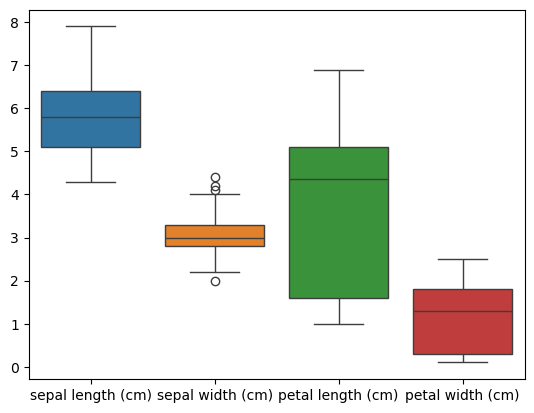

In [41]:
sns.boxplot(data=df)

In [ ]:
# analyse de la normalité

In [43]:
# Supprimer les colonnes non numériques
df_num = df.select_dtypes(include=['float64', 'int64'])

# Effectuer le test de Shapiro-Wilk sur chaque colonne
for column in df_num.columns:
    stat, p = stats.shapiro(df_num[column])
    print(f'Pour la colonne {column} : Statistique de test = {stat}, p-valeur = {p}')

Pour la colonne sepal length (cm) : Statistique de test = 0.9760902723490532, p-valeur = 0.010181161454691156
Pour la colonne sepal width (cm) : Statistique de test = 0.9849178695056319, p-valeur = 0.10115426916130282
Pour la colonne petal length (cm) : Statistique de test = 0.8762680554631075, p-valeur = 7.412263135173186e-10
Pour la colonne petal width (cm) : Statistique de test = 0.9018349381915991, p-valeur = 1.680465210314913e-08


In [57]:
# seule la calonne petal length et petal width n'est pas normalement dustribué car sa p-valaue < 0.05, donc on rejette l'hypothese nulle de normalité

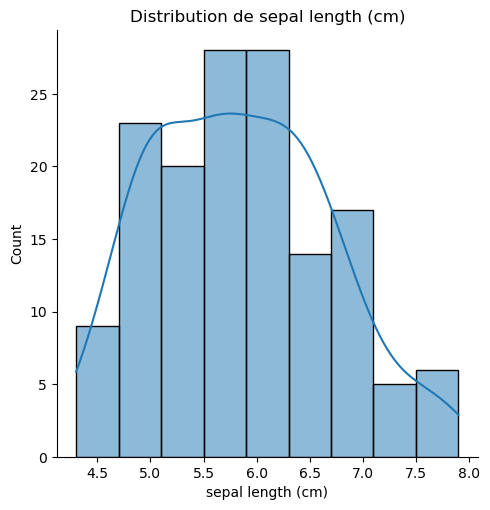

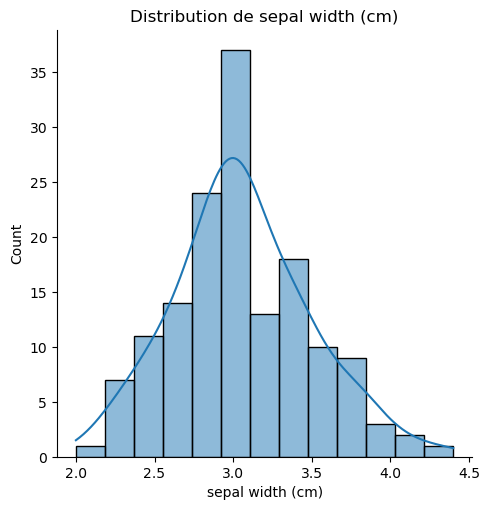

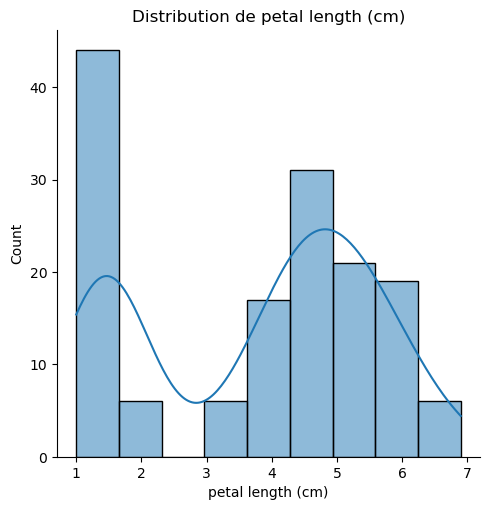

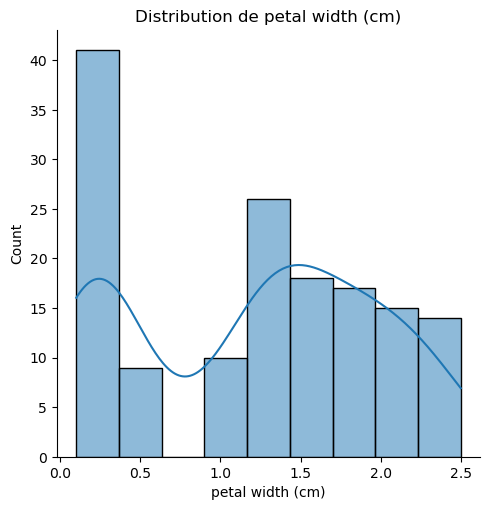

In [44]:
# Tracer la distribution de chaque colonne
for column in df_num.columns:
    sns.displot(df_num[column], kde=True)
    plt.title(f'Distribution de {column}')
    plt.show()

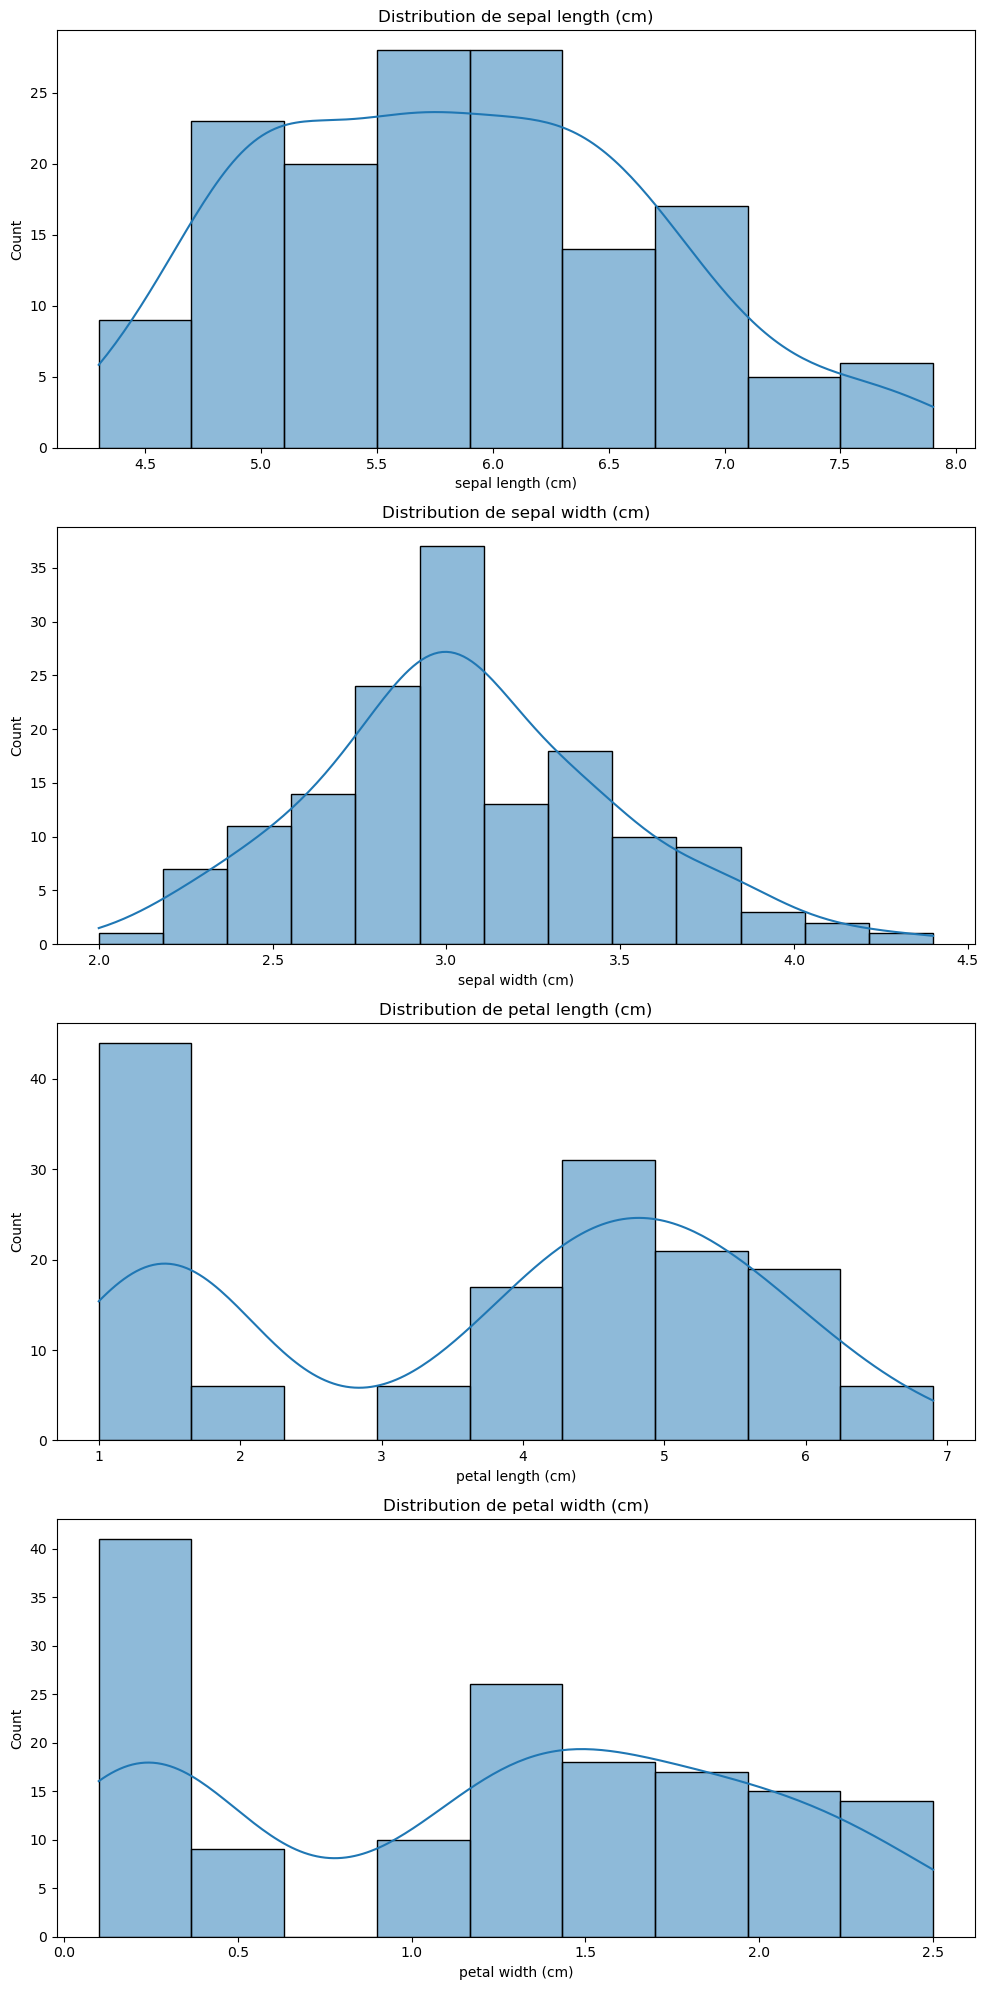

In [45]:
# Créer une figure et des axes
fig, axs = plt.subplots(len(df_num.columns), 1, figsize=(10, 20))

# Tracer la distribution de chaque colonne
for i, column in enumerate(df_num.columns):
    sns.histplot(df_num[column], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution de {column}')

plt.tight_layout()
plt.show()

In [49]:
# analyse variables qualitatives

<Axes: xlabel='variety', ylabel='count'>

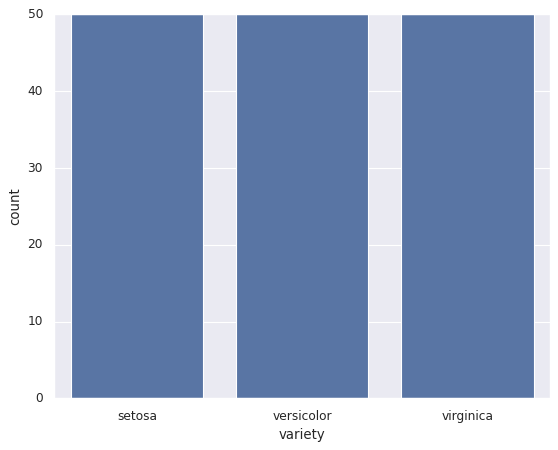

In [53]:
sns.countplot(x=df['variety'])

In [52]:
plt.style.use('classic')
sns.set()


In [55]:
freq_table = df['variety'].value_counts()/len(df)
freq_table

variety
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: count, dtype: float64

([<matplotlib.patches.Wedge at 0x7f95ce72b740>,
 [Text(0.5499999702695115, 0.9526279613277875, 'setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'virginica')])

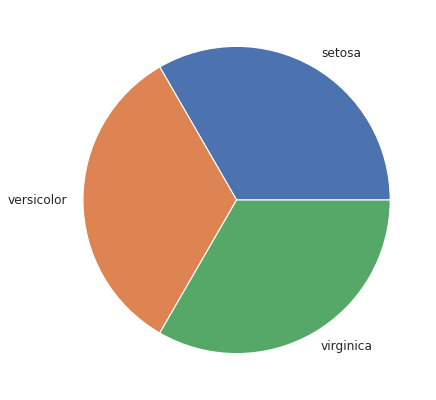

In [56]:
plt.pie(freq_table, labels=freq_table.index)

In [ ]:
# analyse bivariée

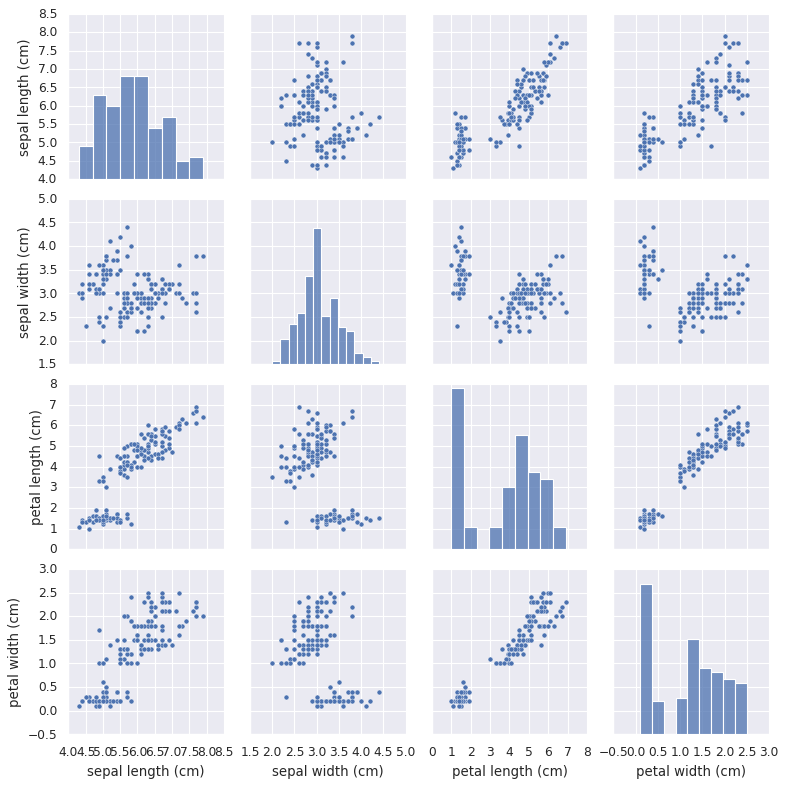

In [59]:
sns.pairplot(df)

In [ ]:
# matrice de correlation    

In [61]:
corr_mat = df_num.corr()

<Axes: >

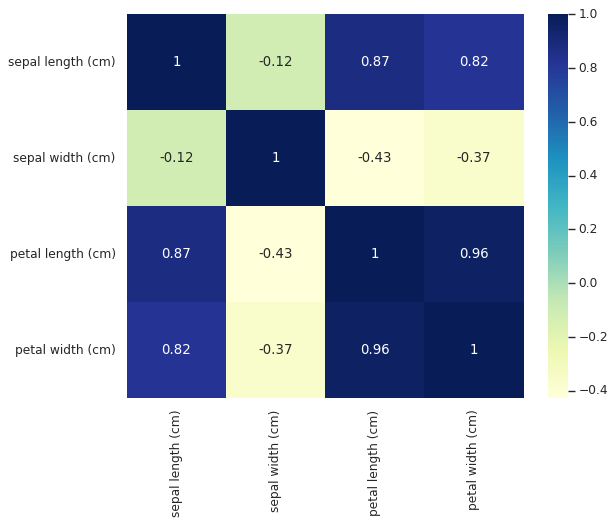

In [62]:
sns.heatmap(corr_mat, annot=True, cmap="YlGnBu")

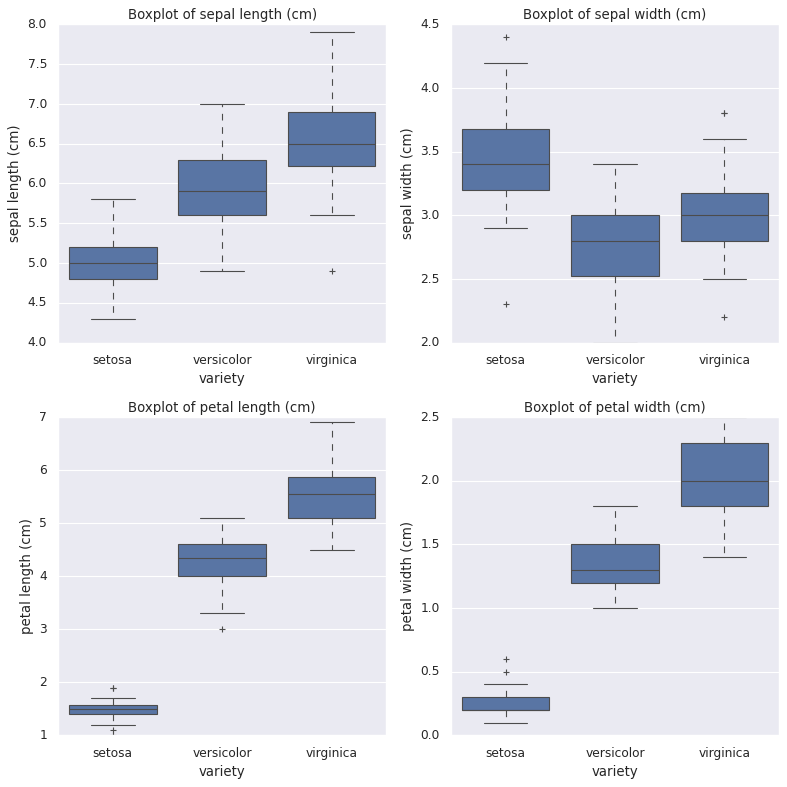

In [68]:
# Créer une figure et des axes
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Tracer la distribution de chaque colonne
for i, column in enumerate(df_num.columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='variety', y=column, data=df)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [ ]:
# les variables n'étant pas toutes normales, on va utiliser un test de Kruskal Walis pour verifier les relations entres 

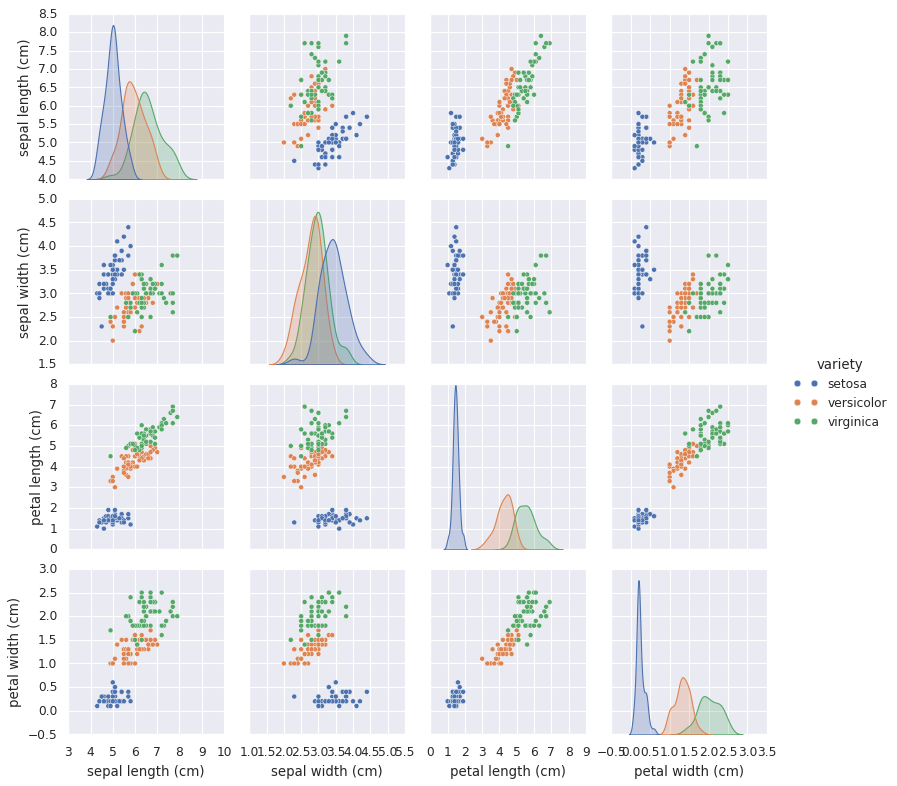

In [70]:
# pairplot

p=sns.pairplot(df, hue = 'variety')

Le test de Kruskal-Wallis est une méthode non paramétrique utilisée pour comparer trois groupes ou plus en termes de leur médiane. Il est souvent utilisé lorsque les hypothèses d’un ANOVA (Analyse de Variance) ne sont pas respectées, par exemple lorsque les données ne sont pas normalement distribuées.

Dans le contexte d’un DataFrame, le test de Kruskal-Wallis peut être utilisé pour comparer les valeurs d’une caractéristique spécifique entre différents groupes. Par exemple, dans le dataset Iris, on pourrait utiliser le test de Kruskal-Wallis pour comparer la longueur des sépales entre les trois espèces d’iris.

Si la valeur p obtenue à partir du test de Kruskal-Wallis est inférieure à un seuil prédéfini (souvent 0,05), on peut rejeter l’hypothèse nulle que les médianes des groupes sont égales. Cela signifie qu’il y a une différence statistiquement significative entre au moins deux des groupes.

Il est important de noter que le test de Kruskal-Wallis ne précise pas quels groupes sont significativement différents. Pour cela, des tests post-hoc peuvent être effectués.


In [72]:


# Confirmation des liaison avec un test de Kruskal-Wallis pour chaque variable

for column in df.columns[:-1]:
    _, p_value = stats.kruskal(*[df[column][df.variety == variety] for variety in df.variety.unique()])
    if p_value < 0.05:
        print(f"La variable {column} est significativement différente entre les espèces (p-value={p_value})")
    else:
        print(f"La variable {column} n'est pas significativement différente entre les espèces (p-value={p_value})")



La variable sepal length (cm) est significativement différente entre les espèces (p-value=8.91873433246198e-22)
La variable sepal width (cm) est significativement différente entre les espèces (p-value=1.5692820940316782e-14)
La variable petal length (cm) est significativement différente entre les espèces (p-value=4.803973591157605e-29)
La variable petal width (cm) est significativement différente entre les espèces (p-value=3.261795552421968e-29)


la valeur p obtenue à partir du test de Kruskal-Wallis est inférieure à un seuil prédéfini (souvent 0,05), on peut rejeter l’hypothèse nulle que les médianes des groupes sont égales. Cela signifie qu’il y a une différence statistiquement significative entre au moins deux des groupes.